In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

datacsv = pd.read_csv('29dataset_dropped_opt.csv', index_col=0)
df = pd.DataFrame(data = datacsv)
df

,E(RB3LYP),Dipole Moment,Polarizability (a),Zero-point Energy Correction,C=O stretch\nFrequency,C=O stretch\nRaman Activity,C=O stretch\nDepolar-P,C2-H stretch\nFrequency,C2-H stretch\nDepolar-P,O NBO Charge,...,L,B1,B5,LUMO(chk),HOMO(chk),X=O(ONBO),X=O(CNBO),"C Length(X=O,CHO)",A_para,B_para
M1,-384.890280,2.976386,82.320667,0.138206,1792.56,67.2699,0.3176,2895.10,0.2969,-0.536,...,6.75,1.76,4.33,0.01238,-0.24837,0.000,0.000,0.00000,0.74,0.31
M2,-384.891819,3.393730,82.941333,0.137724,1799.19,82.1492,0.3278,2905.37,0.3060,-0.531,...,6.75,1.76,4.40,0.01381,-0.24819,0.000,0.000,0.00000,0.78,0.39
M3,-384.892348,3.780420,84.218000,0.137661,1797.59,103.3745,0.3431,2903.04,0.3077,-0.533,...,7.70,1.81,3.16,0.01495,-0.25054,0.000,0.000,0.00000,0.79,0.36
M4,-460.095229,4.813919,87.394333,0.143198,1782.58,82.3785,0.2987,2995.61,0.2999,-0.541,...,6.76,1.75,5.37,0.02047,-0.24760,0.000,0.000,0.00000,0.98,0.49
M5,-460.097202,2.178176,87.727333,0.143040,1796.18,87.0887,0.3267,2913.73,0.3037,-0.533,...,6.75,1.75,5.35,0.01238,-0.25296,0.000,0.000,0.00000,0.73,0.42
M6,-460.098685,4.988572,90.681000,0.143103,1792.93,139.4349,0.3464,2896.49,0.3137,-0.540,...,8.85,1.78,3.18,0.01690,-0.25130,0.000,0.000,0.00000,0.84,0.29
M7,-2916.675203,3.248754,88.329333,0.100233,1791.24,61.3724,0.2859,3000.48,0.2480,-0.525,...,6.78,1.78,4.86,-0.00043,-0.26416,0.000,0.000,0.00000,0.73,0.53
M8,-2916.676864,1.869718,89.644000,0.100118,1804.15,84.9797,0.3394,2918.78,0.3033,-0.521,...,6.86,1.77,4.83,-0.00168,-0.26249,0.000,0.000,0.00000,0.76,0.62
M9,-2916.677538,2.065982,91.846667,0.100110,1800.83,146.4000,0.3339,2913.59,0.2997,-0.525,...,8.51,1.95,3.16,-0.00253,-0.26684,0.000,0.000,0.00000,0.89,0.56
M10,-424.203430,2.994698,94.245667,0.166295,1778.72,64.2892,0.2735,2962.69,0.3055,-0.540,...,6.81,1.88,5.60,-0.06031,-0.24371,0.000,0.000,0.00000,0.98,0.28


In [2]:
df2 = df.drop('M8')
df3 = df2.drop('M18')
df4 = df3.drop('M1')
print(df4)

X_train = df4.iloc[:26,:19].values  # 説明変数
y_train = df4.iloc[:26,19].values   # 目的変数

A8 =df.iloc[7,0:]
A18 =df.iloc[17,0:]
A1 =df.iloc[0,0:]

testframe = pd.DataFrame(data = (A8,A18,A1))
X_test = testframe.iloc[0:3,:19]
y_test = testframe.iloc[0:3,19]

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(X_train)
X_train_st_lasso = standard.transform(X_train)
X_test_st_lasso = standard.transform(X_test)

X_train_st_lasso_df=pd.DataFrame(X_train_st_lasso)
lasso = Lasso(alpha=0.01,random_state=0)
lasso_train = lasso.fit(X_train_st_lasso, y_train)

       E(RB3LYP)  Dipole Moment  Polarizability (a)  \
M2   -384.891819       3.393730           82.941333   
M3   -384.892348       3.780420           84.218000   
M4   -460.095229       4.813919           87.394333   
M5   -460.097202       2.178176           87.727333   
M6   -460.098685       4.988572           90.681000   
M7  -2916.675203       3.248754           88.329333   
M9  -2916.677538       2.065982           91.846667   
M10  -424.203430       2.994698           94.245667   
M11  -479.545271       6.320322          111.650667   
M12  -349.196145       2.728833           72.717333   
M13  -682.609409       1.508276           82.503000   
M14  -573.450618       3.735830          102.529333   
M15  -361.609323       3.665587           65.770333   
M16  -682.608975       1.666873           83.178667   
M17  -546.968781       2.493996          132.582667   
M19  -499.414704       4.826996           99.196000   
M20  -463.555153       3.387544          112.221333   
M21  -574.

[0.74814783 0.76324049 0.75438462 0.76271079 0.7815639  0.82768947
 0.82331032 0.79849271 0.77761494 0.70964721 0.79692483 0.7146379
 0.77348012 0.80526093 0.80485518 0.76258568 0.75588308 0.72750155
 0.68931549 0.78892207 0.73291927 0.71321313 0.80594462 0.82537279
 0.57187092 0.75451017]
R2_score (train):  0.33365969331063094
R2_score (test):  0.526418468625353
RMSE:  0.04898448488006053
[ 0.         -0.          0.01531077  0.         -0.          0.01039096
  0.          0.         -0.02377    -0.00287937  0.          0.01444837
 -0.          0.         -0.02797592 -0.0183947   0.03241031 -0.
 -0.        ] 0.7603846153846152


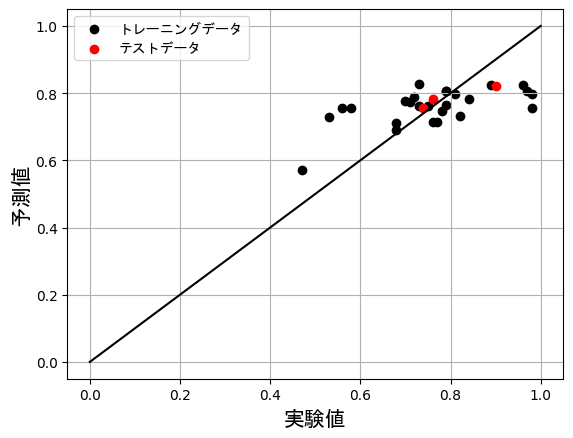

In [3]:
from sklearn.metrics import r2_score

y_pred_lasso_train = lasso_train.predict(X_train_st_lasso)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

print(y_pred_lasso_train)

y_pred_lasso_test = lasso_train.predict(X_test_st_lasso)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))

print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)
print(lasso_train.coef_, lasso_train.intercept_)

plt.scatter(y_train, y_pred_lasso_train, color='black', label="トレーニングデータ")
plt.scatter(y_test, y_pred_lasso_test, color='red', label="テストデータ")
plt.plot([0,1], [0,1], c="black")

plt.grid()
plt.xlabel('実験値', fontname="MS Gothic", fontsize=15)
plt.ylabel('予測値', fontname="MS Gothic", fontsize=15)
plt.legend(loc='upper left', prop = {"family" : "MS Gothic"})

In [10]:
#以下追加基質予測

In [4]:
Ad_csv = pd.read_csv('Additional_prediction.csv', index_col=0)
Ad = pd.DataFrame(data = Ad_csv)
Ad

,E(RB3LYP),Dipole Moment,Polarizability (a),Zero-point Energy Correction,C=O stretch\nFrequency,C=O stretch\nRaman Activity,C=O stretch\nDepolar-P,C2-H stretch\nFrequency,C2-H stretch\nDepolar-P,O NBO Charge,C2-O length,L,B1,B5,LUMO(chk),HOMO(chk),X=O(ONBO),X=O(CNBO),"C Length(X=O,CHO)"
M31_benzaldehyde_flow,-345.582685,3.281821,70.842000,0.110011,1799.21,77.4428,0.3405,2896.88,0.2989,-0.528,1.21628,6.28,1.7,3.11,0.01142,-0.25468,0,0,0
M32_2-Phenylpropionaldehyde_flow,-424.207840,2.665890,90.686333,0.166822,1828.14,16.0672,0.3699,2887.02,0.3746,-0.525,1.21000,7.03,1.7,6.24,-0.03106,-0.23936,0,0,0


In [5]:
X_add = Ad.iloc[:2,:19].values  # 説明変数
X_add_st_lasso = standard.transform(X_add)

y_pred_lasso_add = lasso_train.predict(X_add_st_lasso)
print(y_pred_lasso_add)

[0.75164264 0.69790846]
